# De Numpy a TensorFlow
En el taller pasado vimos como crear tensores basicos y como realizar algunas operaciones escenciales con ellos. En este taller veremos algunas funcionalidades mas avanzadas, en especial, este taller esta enfocado en ver como podemos realizar tareas en TensorFlow que normalmente hariamos en Numpy.

In [1]:
import numpy as np
import tensorflow as tf

sess = tf.Session()

### Arrays
En Numpy utilizamos arreglos multidimensionales para realizar toda clase tareas. Creemos algunos arreglos en Numpy como ejemplo y veamos como podemos operar con arreglos de diferentes dimensiones de acuerdo con las reglas del algebra lineal 

In [16]:
# matriz: dimension (3, 4)
a = np.random.randn(3, 4)

# vector: dimension (3)
b = np.random.rayleigh(3.3, size=(3,))

# vector: dimension (4)
c = np.random.uniform(0.0, 1.0, size=(4,))

# escalar: dimension ()
d = 2.0

# calculo de dimensiones: 
# (3) . (3, 4) + () * (4) == (4) + (4) == (4)
f = np.dot(b, a) + d * c

print("Forma: {}".format(f.shape))
print("Valor: {}".format(f))

Forma: (4,)
Valor: [-0.16623515  9.62417575  2.33475716 -7.06859477]


En este ejemplo realizamos operacion estandar, lo importante a tener en cuenta aqui es que realizamos operaciones de forma exitosa con objetos con diferentes formas / shapes. Tener en cuenta la forma de los arreglos es muy importante porque si nos imponen restricciones en la manera como podemos realizar las operaciones. Por ejemplo, anteriormente utilizamos la funcion `dot` (producto punto) para multiplicar un vector de dimension `(3)` con una matriz de dimension `(3,4)`, sin embargo, veamos que si invertimos el orden de la variables vamos a obtener un error: 

In [21]:
try:
    np.dot(a, b)

    
except Exception as e:
    print("Error: {}".format(e))

Error: shapes (3,4) and (3,) not aligned: 4 (dim 1) != 3 (dim 0)


Esta discusion las dimensiones y el orden de las operaciones es muy importante para utilizar Tensores multidimensiones.

### Tensores
El el taller anterior utilizamos unicamente escalares, sin embargo, al igual que los arreglos de numpy, los tensores de tensorflow puede tener varias dimensiones y ejecutar operaciones de algebra lineal. Recreemos el ejemplo anterior en TensorFlow

In [35]:
# matriz: dimension (3, 4)
a = tf.random_normal((3, 4))

# vector: dimension (3)
b = tf.random_gamma((1, 3), 3.3)

# vector: dimension (4)
c = tf.random_uniform((1, 4), 0.0, 1.0)

# escalar: dimension ()
d = 2.0

# calculo de dimensiones: 
# (3) . (3, 4) + () * (4) == (4) + (4) == (4)
f = tf.matmul(b, a) + d * c

print("Forma: {}".format(f.shape))
print("Objeto: {}".format(f))
print("Valor: {}".format(sess.run(f))[0])

Forma: (1, 4)
Objeto: Tensor("add_5:0", shape=(1, 4), dtype=float32)
V


Con la pequeña excepcion de que TensorFlow nos obliga a convertir los tensores `b` y `c` en una matrices de rango `1`, las operaciones de ambos programas son equivalentes. Asi mismo, si invertirmos el orden de las operaciones tambien obtenemos un error

In [31]:
try:
    np.dot(a, b)

    
except Exception as e:
    print("Error: {}".format(e))

Error: Dimensions must be equal, but are 4 and 3 for 'mul_3' (op: 'Mul') with input shapes: [3,4], [1,3].


##### Formas Dinamicas
Ahora bien, algo que podemos hacer con tensores de tensorflow y no podemos hacer con los arreglos de numpy es tener dimensiones variables / indefinidas. Veamos un ejemplo de esto:

In [18]:
# Creemos un tensor placeholder con la primera dimension variable.
# Para crear dimensiones variables utilizamos 'None' en vez de un entero.
x = tf.placeholder(tf.float32, shape=(None, 2), name='x')

# Tensor aleatorio de dimensiones (2, 5)
w = tf.random_normal((2, 5), name='y')

# Producto punto: x . w
# Debido a la reglas de algebra lineal las dimensiones deben ser:
# (?, 2) . (2, 5) == (?, 5)
y = tf.matmul(x, w, name='y')

# Verfifiquemos que la forma/shape si sea: (?, 5)
print(y)
print("")

# Ejecutemos el tensor y visualicemos el resultado.
print(sess.run(y, feed_dict={
    x: np.random.uniform(-1.0, 1.0, size=(4, 2))
}))

Tensor("y_23:0", shape=(?, 5), dtype=float32)

[[-0.09032293  0.24830988  0.21080302  0.88187146  0.08386514]
 [-0.11958653 -0.15867841 -0.07177992 -0.13025115 -0.44506443]
 [-0.4513019  -0.36950359 -0.10580767  0.11904678 -1.41797817]
 [ 0.37724578  0.24509799  0.04253905 -0.26930976  1.11254048]]


En este ejemplo definimos el tensor $x$ de la forma `(?, 2)` y contruirmos el tensor $y$ con la forma `(?, 5)`. Ahora bien, al tiempo de ejecutar el tensor $y$, le tenemos que pasar una estructura con una forma definida para $x$. En este caso le pasamos un arreglo con la forma `(4, 2)`, osea que la primera dimension es `4`, for lo tanto al evaluar obtenemos que el valor de $y$ tiene la forma `(4, 5)`, lo cual podemos confirmar visualmente.

##### Importancia
Los tensores con dimensiones variables aparecen mucho cuando necesitamos e.g. entrenar redes neuronales por batches de tamaño variable, contruir clasificadores puedan procesar varias muestras al mismo tiempo pero no sabemos cuantas necesitemos procesar, modelos de sequencias donde no sabemos el tamaño total de la sequencia, etc.

### Funciones

Muchas de las funcion de Numpy tienen su equivalente en TensorFlow, a veces de forma directa con el proposito de mantener un API similar. A continuacion se presentara una lista no exhaustiva de funciones de Numpy vs TensorFlow

|     Numpy  | TensorFlow           |
| :- | :- |
| max | reduce_max |
| argmax | argmax | 
| min | reduce_min |
| argmin | argmin | 
| argmin | argmin | 
| mean | reduce_mean |
| abs | abs | 
| mean | reduce_mean |
| sqrt | sqrt |
| power | pow |
| add | add |
| multiply | multiply |

Acontinuacion mostraremos ejemplos con algunas de estas funciones

In [46]:
t = tf.constant(
    [[1.0, 2.0],
     [3.0, 4.0],
     [5.0, 6.0]]
)

print("tensor")
print(sess.run( t ))

# reduce_max
print("")
print("reduce_max")
print(sess.run( tf.reduce_max(t, axis=0) ))
print(sess.run( tf.reduce_max(t, axis=1) ))

# reduce_min
print("")
print("reduce_min")
print(sess.run( tf.reduce_min(t, axis=0) ))
print(sess.run( tf.reduce_min(t, axis=1) ))

# argmax
print("")
print("argmax")
print(sess.run( tf.argmax(t, axis=0) ))
print(sess.run( tf.argmax(t, axis=1) ))

# argmin
print("")
print("argmin")
print(sess.run( tf.argmin(t, axis=0) ))
print(sess.run( tf.argmin(t, axis=1) ))

# reduce_mean
print("")
print("reduce_mean")
print(sess.run( tf.reduce_mean(t, axis=0) ))
print(sess.run( tf.reduce_mean(t, axis=1) ))

# sqrt
print("")
print("sqrt")
print(sess.run( tf.sqrt(t) ))

tensor
[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]]

reduce_max
[ 5.  6.]
[ 2.  4.  6.]

reduce_min
[ 1.  2.]
[ 1.  3.  5.]

argmax
[2 2]
[1 1 1]

argmin
[0 0]
[0 0 0]

reduce_mean
[ 3.  4.]
[ 1.5  3.5  5.5]

sqrt
[[ 0.99999994  1.41421342]
 [ 1.73205078  1.99999988]
 [ 2.23606801  2.44948983]]


###### Slicing
Una de las operaciones mas comunes para trabajar con arreglos/tensores es el *slice*. Esta operacion crea un sub-arreglo a partir de un arreglo existente. Ejemplos sencillos de esto puede ser sacar un vector a partir de una filo o columna de una matriz, o una submatriz de una matriz. 
TensorFlow, al igual que Numpy, aprovecha el protocolo de acceso (`obj[...]`) para realizar esta operacion sobre un tensor. Veamos unos ejemplos

In [54]:
t = tf.constant(
    [[1.0, 2.0],
     [3.0, 4.0],
     [5.0, 6.0]]
)

# secunda fila
print("Segunda fila")
print(sess.run( t[1] ))

# primera columna
print("")
print("Primera Columna")
print(sess.run( t[:, 0] ))

# primera columna
print("")
print("Primera Columna")
print(sess.run( t[:, 0] ))

# ultima fila
print("")
print("Ultima Fila")
print(sess.run( t[-1] ))

# ultima fila
print("")
print("Sub matriz con todas menos la primera fila")
print(sess.run( t[1:] ))

Segunda fila
[ 3.  4.]

Primera Columna
[ 1.  3.  5.]

Primera Columna
[ 1.  3.  5.]

Ultima Fila
[ 5.  6.]

Sub matriz con todas menos la primera fila
[[ 3.  4.]
 [ 5.  6.]]


### Aplicaciones

##### Mandelbrot Set

In [7]:
# Numero de iteraciones
n = 500

##############################################
# Crear tensores del Mandelbrot
##############################################

# Condiciones iniciales, utilizamos dimensiones variables por si queremos 
# variar la forma de la imagen en cualquier momento.
c = tf.placeholder(tf.complex128, shape=(None, None), name='c')

with tf.device("/cpu:0"): #cambiar por /gpu:0 si tienes configurada la gpu con tensorflow
    
    # Iniciamos z inicialmente como un vector de ceros con la misma forma de 'c'
    z = tf.zeros_like(c)

    # Iterar 'n' veces con la formula de mandelbrot
    for i in range(n):
        z = z*z + c

    # Calcular pertenencia condicion de radio 2
    mandelbrot = tf.abs(z) <= 2.0

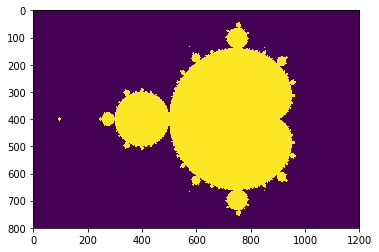

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt

##############################################
# Definir parametros
##############################################

# region a visualizar
xmin = -2.0
xmax = 1.0
ymin = -1.0j
ymax = 1.0j


# dimensiones de la imagen
nx = 1200
ny = 800

##############################################
# Definir las condiciones iniciales con Numpy
##############################################

# crear componentes 'x' y 'y'
cx_, cy_ = np.meshgrid(
    np.linspace(xmin, xmax, nx),
    np.linspace(ymin, ymax, ny)
)

# unir components
c_ = cx_ + cy_

##############################################
# Definir las condiciones iniciales con Numpy
##############################################

m = sess.run(mandelbrot, feed_dict={
    c: c_
})

plt.imshow(m)
plt.show()